<a href="https://colab.research.google.com/github/Pavel-Zinkevich/Fruits-and-Vegetables-Image-Recognition/blob/main/Fruits_and_Vegetables_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


In [37]:
import numpy as np

In [4]:
print(os.listdir(path))

['validation', 'test', 'train']


In [5]:
import shutil

shutil.copytree(os.path.join(path, 'train'), './train')
shutil.copytree(os.path.join(path, 'validation'), './validation')
shutil.copytree(os.path.join(path, 'test'), './test')

'./test'

In [45]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
    'train/',
    image_size=(224, 224),
    batch_size=32
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    'test/',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'validation/',
    image_size=(224, 224),
    batch_size=32
)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [27]:
 # Просмотр классов
class_names = train_dataset.class_names
print("Классы:", class_names)

Классы: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [30]:
num_classes = len(train_dataset.class_names)
print(f"Number of classes: {num_classes}")

Number of classes: 36


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Создаем модель CNN
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Нормализация пикселей

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # num_classes — количество классов
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Обучение модели
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 623ms/step - accuracy: 0.0574 - loss: 3.7371 - val_accuracy: 0.1937 - val_loss: 2.7146
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 596ms/step - accuracy: 0.1958 - loss: 2.7663 - val_accuracy: 0.4530 - val_loss: 1.9623
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 595ms/step - accuracy: 0.3429 - loss: 2.2182 - val_accuracy: 0.7436 - val_loss: 1.1010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 600ms/step - accuracy: 0.5394 - loss: 1.6187 - val_accuracy: 0.7749 - val_loss: 0.8054
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 595ms/step - accuracy: 0.6843 - loss: 1.0612 - val_accuracy: 0.8803 - val_loss: 0.4933
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 590ms/step - accuracy: 0.8281 - loss: 0.6011 - val_accuracy: 0.9202 - val_loss: 0.4172
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 577ms/step - accuracy: 0.8897 - loss: 0.3926 - val_accuracy: 0.9231 - val_loss: 0.4236
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 595ms/step - accuracy: 0.9342 - loss: 0.2454 - val_accu

In [46]:
predictions = model.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()
print(predicted_classes)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 564ms/step
[ 0  0  0  0 12  3  0  0  0 14  1  1 11  1  1  1 23  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  3  3  5  5  5  6  6  6  6  9  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8 26  8  8  8  8  8  8  8 31  9  9 31  9  9  9
  9 31 31 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12
 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 29 14 14 14 14 14
 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16
 16 17 17 17 17 17 17 17 17 21 17 18 18 18 18 18 18 18 18 18 18 19 19 19
 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21
 21 21 21 22 22 22 22 22 22 22 22 26 22 23 23 23 23 23 23 23 23 23 23 24
 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26
 26 26 26 26 26 27 27 14 27 27 27 27 27 34 27 28 28 28 28 28 28 28 28 28
 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31
 31 31 31 

In [47]:
true_classes = tf.concat([y for x, y in test_dataset], axis=0).numpy()

In [48]:
true_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.94


In [35]:
# После обучения модели
loss, accuracy = model.evaluate(test_dataset)
print(f"Точность на тестовом наборе: {accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 671ms/step - accuracy: 0.9359 - loss: 0.5188
Точность на тестовом наборе: 0.9443


In [52]:
import matplotlib.pyplot as plt

# Получим изображения, предсказания и реальные метки
images = []
true_labels = []
pred_labels = []

for x_batch, y_batch in test_dataset:
    preds = model.predict(x_batch)
    preds_classes = tf.argmax(preds, axis=1)

    images.extend(x_batch.numpy())
    true_labels.extend(y_batch.numpy())
    pred_labels.extend(preds_classes.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


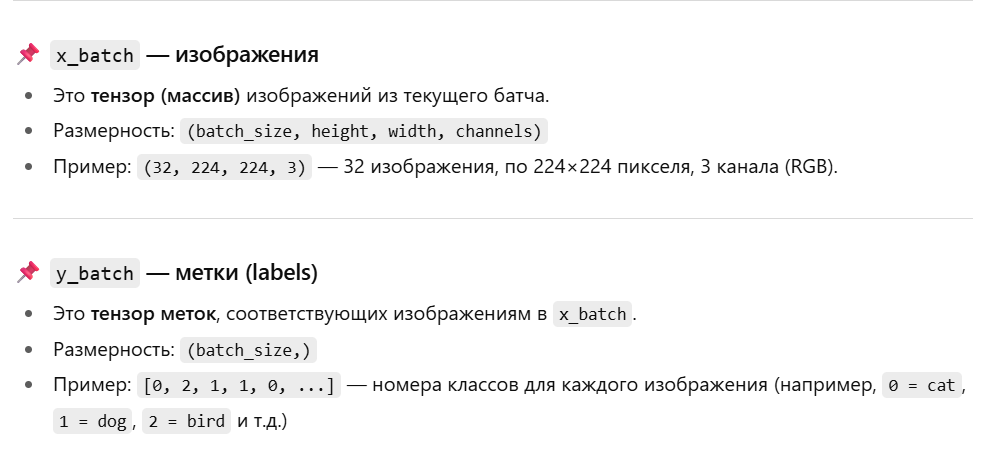

In [53]:
import numpy as np

images = np.array(images)
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

errors = np.where(true_labels != pred_labels)[0]
print(f"Количество ошибок: {len(errors)}")


Количество ошибок: 20


In [54]:
class_names = test_dataset.class_names  # Или train_dataset.class_names


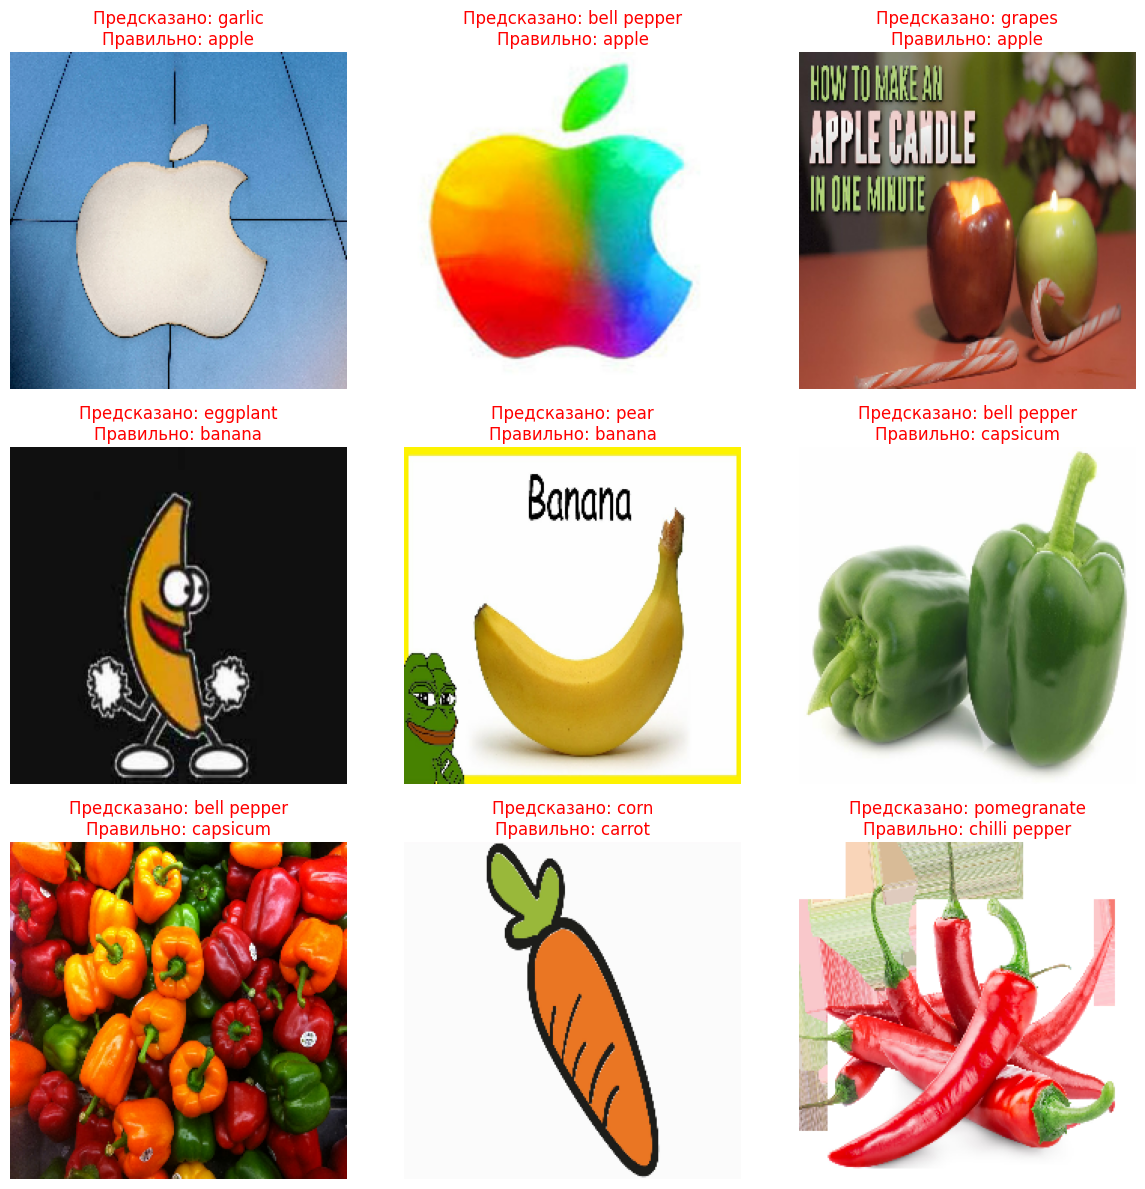

In [55]:
N = 9  # сколько ошибок показать
plt.figure(figsize=(12, 12))

for i, idx in enumerate(errors[:N]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[idx].astype("uint8"))  # преобразуем обратно в изображение
    plt.axis('off')
    plt.title(f"Предсказано: {class_names[pred_labels[idx]]}\nПравильно: {class_names[true_labels[idx]]}",
              color='red' if pred_labels[idx] != true_labels[idx] else 'green')

plt.tight_layout()
plt.show()
